<h1> Homework 5: Young People Survey dataset </h1>
<h3> Question : How likely a person is to “pay more money for good, quality or healthy food” (on a scale from 1 to 5) </h3>

<h5> Dataset Link : (https://www.kaggle.com/miroslavsabo/young-people-survey/) </h5>


<h2> Part 1 :  Import all Libraries </h2>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<h1>Part 2 :  Import and Analyze Original Data </h1>
<br>
About the Data : 
<br>
1. The data file response.csv consists of 1010 examples/rows and 150 features/columns (139 integer and 11 categorical)
<br>
2. The data file columns.csv : Mapps between original (long) variable names and their shortened versions.
<br>

The variables can be split into the following groups:
<br>
1. Music preferences (19 columns) <br>
2. Movie preferences (12 columns) <br>
3. Hobbies & interests (32 columns) <br>
4. Phobias (10 columns) <br>
5. Health habits (3 columns) <br>
6. Personality traits, views on life, & opinions (57columns) <br>
7. Spending habits (7 columns) <br>
8. Demographics (10 columns) <br>
The students rated from 1-5, and 1 being the lowest and 5 being the highest <br>

In [2]:
# importing the data and some information about the data

young = pd.read_csv('responses.csv')
print("Type",type(young))
print("Shape",young.shape)
print("Describe the data")
pd.set_option('display.max_columns', 500)
young.describe() 



Type <class 'pandas.core.frame.DataFrame'>
Shape (1010, 150)
Describe the data


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

<h3> Null Values in the Dataset </h3>

In [3]:
list = young.isnull().sum()
list.sort_values(axis=0, ascending=False)

Weight                            20
Height                            20
Passive sport                     15
Chemistry                         10
Geography                          9
Documentary                        8
Latino                             8
Smoking                            8
Punk                               8
Theatre                            8
Rock n roll                        7
Countryside, outdoors              7
Gardening                          7
Techno, Trance                     7
Alternative                        7
Reggae, Ska                        7
Classical music                    7
Age                                7
Daily events                       7
Compassion to animals              7
Final judgement                    7
Criminal damage                    7
Science and technology             6
Biology                            6
Giving                             6
Writing                            6
Art exhibitions                    6
R

<h2> Part 3: Perform Pre processing of Data :  </h2>
<br>

Pre-processing is handled in the file preProcessing.py where the code performs following task : 
<br>
1. Handled Categorical data : Via Get_dummies () function which helps in converting categorical variables into dummy/indicator variables for categories like : ['Gender','Left - right handed','Only child','Village - town','House - block of flats']
<br>
2. Handle Missing Values : With the mostfrequent values and mean 
<br>
3. Continuous values are divided into bins of 5. For columns Age,Height,Weight
<br>
4. Since all values are now in scale of 1 to 5 the data is normalized.


In [4]:
import preProcessing

young1 = pd.DataFrame(data=[])
young1 = (preProcessing.performPreprocessing(young))
pd.options.display.max_columns = 999
young1

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Education,Gender_female,Gender_male,Left - right handed_left handed,Left - right handed_right handed,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,2.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3,3.0,4.0,5.0,3.0,3.0,1,3.0,2.0,3.0,0.0,1.0,4.0,1,0,0,1,1,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,1.0,3.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,3.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3,3.0,4.0,1.0,4.0,2.0,5,2.0,2.0,3.0,0.0,2.0,4.0,1,0,0,1,1,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,1.0,3.0,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,3,2.0,4.0,1.0,4.0,3.0,4,2.0,2.0,4.0,1.0,2.0,3.0,1,0,0,1,1,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.

In [5]:
young1.isnull().sum()

Music                                    0
Slow songs or fast songs                 0
Dance                                    0
Folk                                     0
Country                                  0
Classical music                          0
Musical                                  0
Pop                                      0
Rock                                     0
Metal or Hardrock                        0
Punk                                     0
Hiphop, Rap                              0
Reggae, Ska                              0
Swing, Jazz                              0
Rock n roll                              0
Alternative                              0
Latino                                   0
Techno, Trance                           0
Opera                                    0
Movies                                   0
Horror                                   0
Thriller                                 0
Comedy                                   0
Romantic   

<h2> Part 4: Feature Engineering </h2> 
<br>
Extract the most relevant features.
<br>
The scikit learn library provides ways to select the best features sklearn.feature_selection import SelectKBest which give the highest scoring features.
<br>
In this problem I have used correlation matrix with respect to target variable and selected the top 10 important features.

The most important features for young survey data is shown below from the correlation calculated:


In [6]:
import copy

def do_ploting(x, y, figsize): 
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

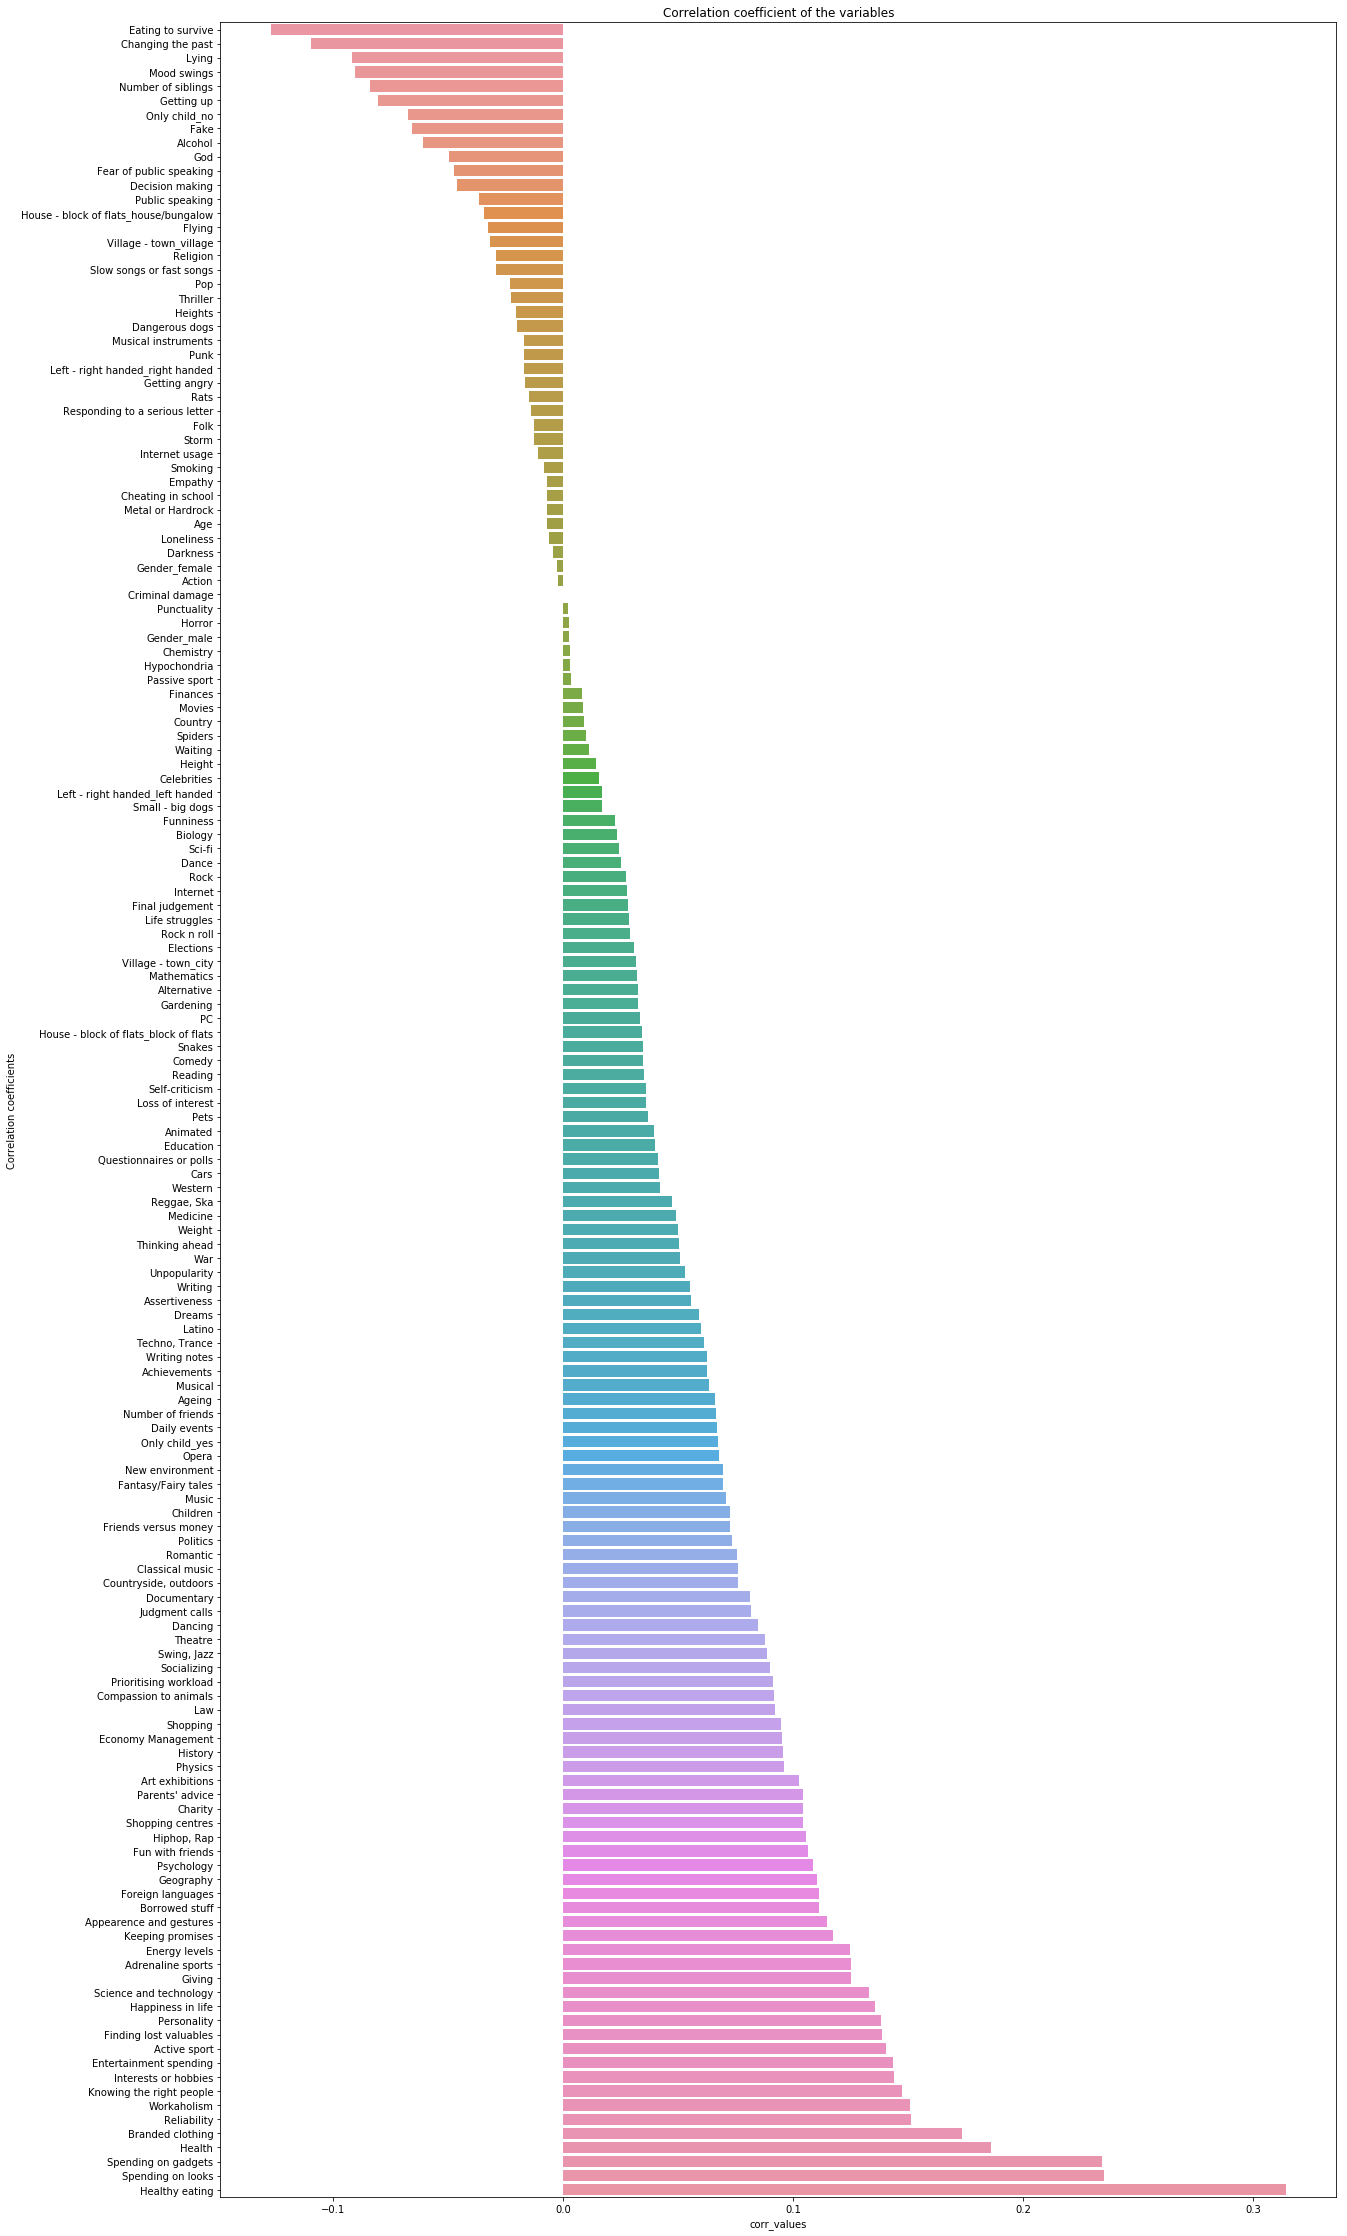

In [7]:
def correlation_plot(pass_feature, df_main, figsize = (20,40)):
    def calc_corr(pass_feature, df, cols, figsize): #calculate correlation
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[pass_feature])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    #df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(pass_feature)
    corrs_one = calc_corr(pass_feature, df, cols_floats, figsize)
    
    return [corrs_one]

corrs_plot = correlation_plot('Spending on healthy eating', young1)

Pick up the top ten important features from the above graph


In [8]:
topImportantFeatures = corrs_plot[0].features.tail(8)
print(topImportantFeatures)

119    Knowing the right people
79                  Workaholism
82                  Reliability
135            Branded clothing
101                      Health
138         Spending on gadgets
137           Spending on looks
75               Healthy eating
Name: features, dtype: object


In [9]:
target = young1.columns[139]
target

'Spending on healthy eating'

In [10]:
positive_corr=young1[topImportantFeatures]
positive_corr
#feature_subset = negative_corr.join(positive_corr)
#feature_subset
type(positive_corr)

pandas.core.frame.DataFrame

<h2> Part 5 : Apply Models to see which one gives the best accuracy on our extracted features data </h2>

In [11]:
from sklearn.cross_validation import train_test_split

# import features and split the data on those top important features

#X_train,y_train,X_test,y_test,X_val,y_val = featureSelection.selectBestFeature(young1)

Y= young1.iloc[:,139]
X= positive_corr

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)


C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<b> Best Model for the young Survey data

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf7 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

clf7.fit(X_train, y_train)
print("Train accuracy on Random Forest",np.mean(clf7.predict(X_train) == y_train))
y_pred = clf7.predict(X_test)
print("Test accuracy on Random Forest",np.mean(y_pred == y_test))
#print(y_pred.shape)
#print()

#confusion_matrix(y_test, y_pred)
#(tn, fp, fn, tp)
#Max Depth 5 ,9 
# n Estimator = 60
print(classification_report(y_test, y_pred))
print()

Train accuracy on Random Forest 0.548951048951
Test accuracy on Random Forest 0.453947368421
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       1.00      0.06      0.11        17
        3.0       0.42      0.44      0.43        43
        4.0       0.42      0.61      0.50        54
        5.0       0.59      0.47      0.52        34

avg / total       0.51      0.45      0.43       152




C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<b> Second Best Model

In [24]:
from sklearn.svm import SVC
clf = SVC(C=1000.0,gamma=.001, kernel='rbf')
clf.fit(X_train, y_train)
#scores = cross_val_score(clf , X , Y, cv =5 , scoring = 'accuracy')
#print(scores.mean())
print("Train accuracy on SVM",np.mean(clf.predict(X_train) == y_train))
#print("Development accuracy",np.mean(clf.predict(X_val) == y_val))
print("Test accuracy on SVM",np.mean(clf.predict(X_test) == y_test))

Train accuracy on SVM 0.460372960373
Test accuracy on SVM 0.440789473684


<b> Other Models

In [26]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import cross_val_score
Rforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
scores = cross_val_score(Rforest , X , Y, cv =5 , scoring = 'accuracy')
print("Random Forest cross validation accuracy ",scores.mean())


Random Forest cross validation accuracy  0.413978836092


In [27]:
from sklearn.svm import SVC
clf = SVC(C=1000.0,gamma=.001, kernel='rbf')
#clf.fit(X_train, y_train)
scores = cross_val_score(clf , X , Y, cv =5 , scoring = 'accuracy')
print("SVC cross validation accuracy ",scores.mean())

SVC cross validation accuracy  0.405154928371


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=100,
    learning_rate=.001)
scores = cross_val_score(bdt_real , X_train , y_train, cv =5 , scoring = 'accuracy')
print(scores.mean())


0.367169051867


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
print("Decision Tree Train accuracy",np.mean(dt.predict(X_train) == y_train))
print(" Decision Tree Test accuracy",np.mean(dt.predict(X_test) == y_test))

Train accuracy 0.439393939394
Test accuracy 0.447368421053


In [28]:
from sklearn.naive_bayes import GaussianNB
clf5 =  GaussianNB()
clf5.fit(X_train, y_train)
GaussianNB(priors=None)

print("GaussianNB Train accuracy",np.mean(clf5.predict(X_train) == y_train))
print("GaussianNB Test accuracy",np.mean(clf5.predict(X_test) == y_test))


GaussianNB Train accuracy 0.421911421911
GaussianNB Test accuracy 0.401315789474


In [22]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s",score)
    print()

    clf2 = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf2.fit(X_train,y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r",mean, std * 2, params)
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf2.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for %s precision



C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\m

C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Charu\Anaconda3\lib\site-packages\sklearn\m

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

%0.3f (+/-%0.03f) for %r 0.0648018648019 0.000574206839474 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.0648018648019 0.000574206839474 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.209481323775 0.0876712232935 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.0648018648019 0.000574206839474 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.254145539097 0.0259551739368 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.209743576974 0.0864250687574 {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.363401112087 0.15930924929 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.238778218077 0.0165167419668 {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
%0.3f (+/-%0.03f) for %r 0.231999850644 0.0194372951717 {'C': 1, 'k

<h2> Part 6 : Evaluation and Curves </h2> 

<h3> Underfitting and Overfitting </h3>

We can see from the below hyperparameter curve that with increase in Max Depth the model starts to overfit and the error is reduced for the training data whereas when depth =1 the model is underfit with less accuracy and greater error.

On depth1 : Training Error 0.6421911421911422 , Testing error 0.5855263157894737 
On depth2 : Training Error 0.5944055944055944 , Testing error 0.5328947368421053 
On depth3 : Training Error 0.548951048951049 , Testing error 0.5723684210526315 
On depth4 : Training Error 0.5034965034965035 , Testing error 0.5328947368421053 
On depth5 : Training Error 0.46853146853146854 , Testing error 0.5789473684210527 
On depth6 : Training Error 0.40559440559440557 , Testing error 0.6052631578947368 
On depth7 : Training Error 0.3146853146853147 , Testing error 0.5855263157894737 
On depth8 : Training Error 0.22843822843822845 , Testing error 0.5657894736842105 
On depth9 : Training Error 0.1655011655011655 , Testing error 0.5986842105263158 
On depth10 : Training Error 0.12121212121212122 , Testing error 0.618421052631579 
On depth11 : Training Error 0.07459207459207459 , Testing error 0.5592105263157895 
On depth12 : Training Error 0.04312354312354312 , Testing error 0.5986842105263158 
On depth1

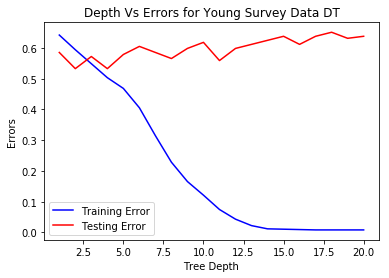

In [237]:
import matplotlib.pyplot as plt

training_error =[]
testing_error=[]
for i in range(1,21):
    dt = RandomForestClassifier(max_depth=i, max_features='auto',n_estimators=60)
    dt.fit(X_train, y_train)
    training_error.append(np.mean(dt.predict(X_train) != y_train))
    testing_error.append(np.mean(dt.predict(X_test) != y_test))
    print("On depth{0} : Training Error {1} , Testing error {2} ".format(i,training_error[i-1],
    testing_error[i-1]))
    
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], training_error,'b-',label='Training Error')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], testing_error,'r-',label='Testing Error')
plt.legend()
plt.title('Depth Vs Errors for Young Survey Data DT')
plt.xlabel('Tree Depth')
plt.ylabel('Errors')
plt.show()

<b> Learning Curve

                         
GridSearchCV(cv=None, error_score=...,
       estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
                     decision_function_shape='ovr', degree=..., gamma=...,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=...,
                     verbose=False),
       fit_params=None, iid=..., n_jobs=1,
       param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
       scoring=..., verbose=...)



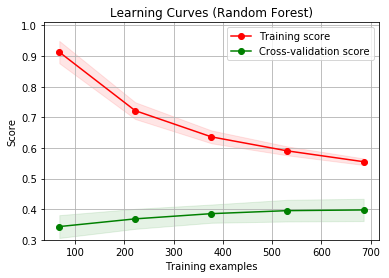

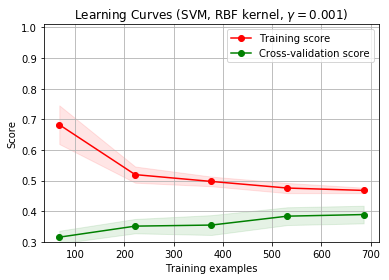

In [238]:
#Reference SCIKIT LEARN Library

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C=1000.0,gamma=.001, kernel='rbf')
plot_learning_curve(estimator, title, X_train, y_train, (0.3, 1.01), cv=cv, n_jobs=4)

plt.show()

<b> Evaluation of Target Variable Depending Upon Category

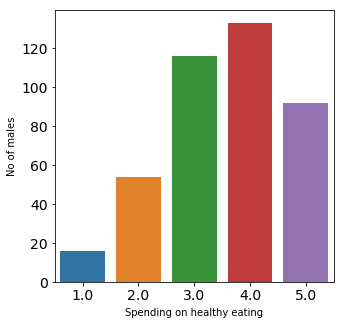

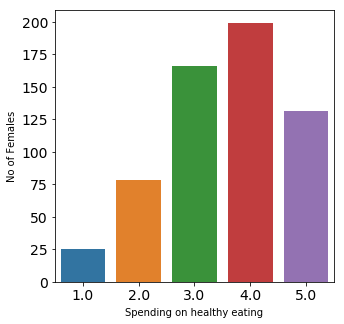

In [260]:
female = young1[young1.Gender_female == 1]
male = young1[young1.Gender_male == 1]

# Plot distribution of Spending on healthy eating by gender 
# male
target_variable = 'Spending on healthy eating'
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(male[target_variable], orient = 'h').set_ylabel("No of males") 
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

# female
target_variable = 'Spending on healthy eating'
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(female[target_variable], orient = 'h').set_ylabel("No of Females") 
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

From the above graph we can say that females spend more on "Health Eating" than Men

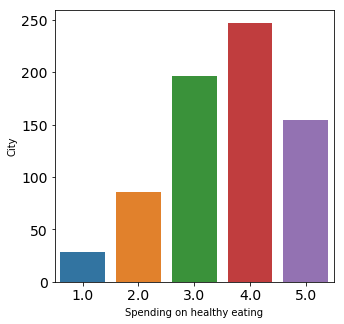

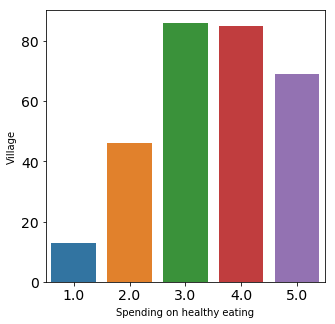

In [276]:
city = young1[young1["Village - town_city"] == 1]
village = young1[young1["Village - town_village"] == 1]

# Plot distribution of Spending on healthy eating by Township 
# City
target_variable = 'Spending on healthy eating'
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(city[target_variable], orient = 'h').set_ylabel("City") 
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

# Village
target_variable = 'Spending on healthy eating'
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(village[target_variable], orient = 'h').set_ylabel("Village") 
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

From the above graph we can say that City people spend more on "Health Eating" than Village people